# Experiment on LSTM

This notebook showcase the experimental results

Experiment:
1. LSTM with 1 layer
2. LSTM with 2 layers

In [9]:
import os
import pickle as pkl
from typing import Tuple

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LSTM with 1 layer

In [13]:
with open (os.path.join("../src/saved_model/run_2024-04-09_18-20-57", 'model_train_results.pkl'), 'rb') as f:
    exp1_results = pkl.load(f)
    exp1_loss_res = pd.DataFrame(exp1_results[0])
    exp1_acc_res = pd.DataFrame(exp1_results[1])

In [10]:
def clean_metrics_df(loss_res:pd.DataFrame, acc_res:pd.DataFrame)-> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Clean metrics DataFrames by resetting the index, renaming columns, and adjusting epoch values.

    Args:
    - loss_res (pd.DataFrame): DataFrame containing loss metrics.
    - acc_res (pd.DataFrame): DataFrame containing accuracy metrics.

    Returns:
    - Tuple[pd.DataFrame, pd.DataFrame]: Tuple containing cleaned loss DataFrame and cleaned accuracy DataFrame.
    """
    # Reset index and rename columns for loss DataFrame
    loss_df = loss_res.reset_index()
    loss_df.rename(columns={'index':'epoch'},inplace=True)
    loss_df['epoch'] = loss_df['epoch'] + 1

    # Reset index and rename columns for accuracy DataFrame
    acc_df = acc_res.reset_index()
    acc_df.rename(columns={'index':'epoch'},inplace=True)
    acc_df['epoch'] = acc_df['epoch'] + 1

    return loss_df, acc_df

In [14]:
exp1_loss_df, exp1_acc_df = clean_metrics_df(exp1_loss_res, exp1_acc_res)

Text(0.5, 1.0, 'Training, Validation and Test Accuracy Values (LSTM with 1 layer)')

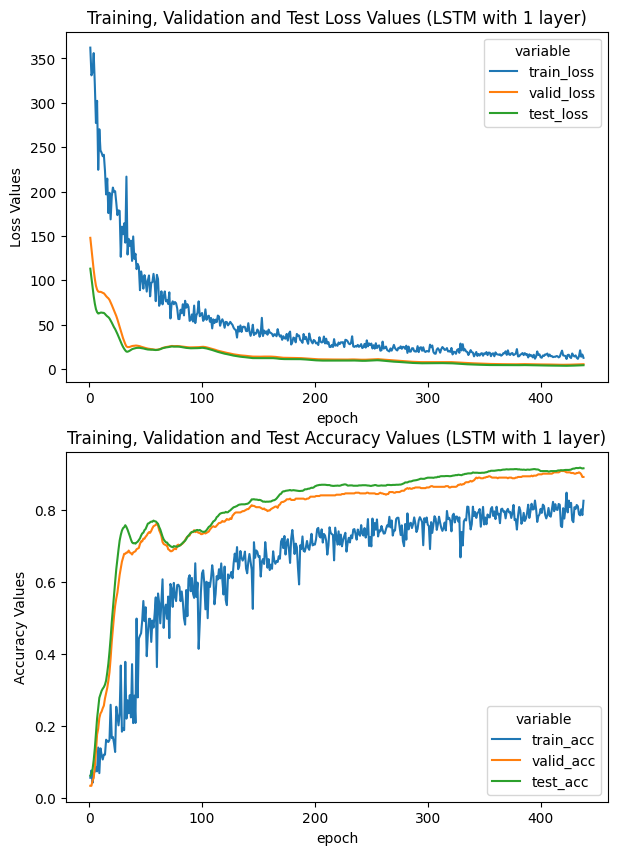

In [17]:
fig,ax = plt.subplots(2,1, figsize=(7,10))
sns.lineplot(data=exp1_loss_df.melt(id_vars='epoch'),x='epoch',y='value',hue='variable',ax=ax[0])
ax[0].set_ylabel("Loss Values")
ax[0].set_title("Training, Validation and Test Loss Values (LSTM with 1 layer)")
sns.lineplot(data=exp1_acc_df.melt(id_vars='epoch'),x='epoch',y='value',hue='variable', ax=ax[1])
ax[1].set_ylabel("Accuracy Values")
ax[1].set_title("Training, Validation and Test Accuracy Values (LSTM with 1 layer)")

### Val Precision, Recall and F1-Score

(from model_2024-04-09_18-20-57.log)  

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.9167    | 0.5238 | 0.6667   | 21      |
| 1     | 0.8571    | 0.5217 | 0.6486   | 23      |
| 2     | 0.9427    | 0.9427 | 0.9427   | 157     |
| 3     | 0.0000    | 0.0000 | 0.0000   | 3       |
| 4     | 1.0000    | 0.2143 | 0.3529   | 14      |
| 5     | 0.9750    | 0.9681 | 0.9715   | 282     |
| 6     | 1.0000    | 0.6667 | 0.8000   | 18      |
| 7     | 0.4203    | 0.9667 | 0.5859   | 30      |
|       |           |        |          |         |
| Accuracy |          |        | 0.8905   | 548     |
| Macro avg | 0.7640  | 0.6005 | 0.6210   | 548     |
| Weighted avg | 0.9243 | 0.8905 | 0.8902 | 548     |


### Test Precision, Recall and F1-Score 
(from model_2024-04-09_18-20-57.log)  

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.9111    | 0.4713 | 0.6212   | 87      |
| 1     | 0.9730    | 0.4444 | 0.6102   | 81      |
| 2     | 0.9826    | 0.9756 | 0.9791   | 696     |
| 3     | 0.7500    | 0.3000 | 0.4286   | 10      |
| 4     | 0.6000    | 0.0833 | 0.1463   | 36      |
| 5     | 0.9799    | 0.9898 | 0.9848   | 1083    |
| 6     | 0.9792    | 0.7769 | 0.8664   | 121     |
| 7     | 0.3410    | 0.9867 | 0.5068   | 75      |
|       |           |        |          |         |
| Accuracy |          |        | 0.9146   | 2189    |
| Macro avg | 0.8146  | 0.6285 | 0.6429   | 2189    |
| Weighted avg | 0.9485 | 0.9146 | 0.9154 | 2189    |




## LSTM with 2 layers

In [18]:
with open (os.path.join("../src/saved_model/run_2024-04-09_21-12-00", 'model_train_results.pkl'), 'rb') as f:
    exp2_results = pkl.load(f)
    exp2_loss_res = pd.DataFrame(exp2_results[0])
    exp2_acc_res = pd.DataFrame(exp2_results[1])

In [19]:
exp2_loss_df, exp2_acc_df = clean_metrics_df(exp2_loss_res, exp2_acc_res)

In [23]:
exp2_acc_df

,epoch,train_acc,valid_acc,test_acc
0,1,0.227669,0.335766,0.391503
1,2,0.253595,0.385037,0.494746
2,3,0.355884,0.454380,0.590681
3,4,0.157180,0.541971,0.621288
4,5,0.243265,0.556569,0.610324
...,...,...,...,...
546,547,0.814057,0.917883,0.940155
547,548,0.815678,0.916058,0.940155
548,549,0.850516,0.916058,0.940612
549,550,0.828641,0.916058,0.938785


In [25]:
exp2_loss_res

,train_loss,valid_loss,test_loss
0,327.602570,89.168716,76.754906
1,289.198120,76.013344,66.366028
2,179.950150,66.269196,59.690792
3,298.370178,61.113346,56.605663
4,295.582977,58.315422,55.602196
...,...,...,...
546,7.669077,1.173376,1.011509
547,10.127537,1.178378,1.021319
548,6.052701,1.182566,1.030866
549,6.544426,1.185093,1.039938


Text(0.5, 1.0, 'Training, Validation and Test Accuracy Values (LSTM with 2 layers)')

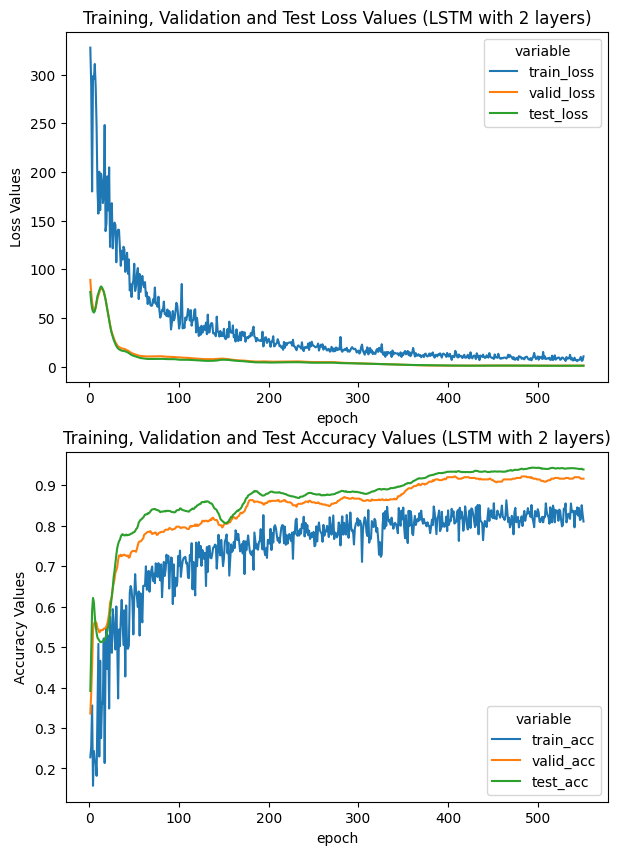

In [26]:
fig1,ax1 = plt.subplots(2,1, figsize=(7,10))
sns.lineplot(data=exp2_loss_df.melt(id_vars='epoch'),x='epoch',y='value',hue='variable',ax=ax1[0])
ax1[0].set_ylabel("Loss Values")
ax1[0].set_title("Training, Validation and Test Loss Values (LSTM with 2 layers)")
sns.lineplot(data=exp2_acc_df.melt(id_vars='epoch'),x='epoch',y='value',hue='variable', ax=ax1[1])
ax1[1].set_ylabel("Accuracy Values")
ax1[1].set_title("Training, Validation and Test Accuracy Values (LSTM with 2 layers)")

### Val Precision, Recall and F1-Score

(from model_2024-04-09_21-12-00.log)  

|       | precision | recall | f1-score | support |
|-------|-----------|--------|----------|---------|
| 0     | 0.8462    | 0.4783 | 0.6111   | 23      |
| 1     | 0.9259    | 0.8333 | 0.8772   | 30      |
| 2     | 0.9474    | 1.0000 | 0.9730   | 18      |
| 3     | 0.9576    | 0.9610 | 0.9593   | 282     |
| 4     | 0.1667    | 1.0000 | 0.2857   | 3       |
| 5     | 0.9231    | 0.5714 | 0.7059   | 21      |
| 6     | 0.9202    | 0.9554 | 0.9375   | 157     |
| 7     | 1.0000    | 0.8571 | 0.9231   | 14      |
|       |           |        |          |         |
| accuracy |          |        | 0.9161   | 548     |
| macro avg | 0.8359  | 0.8321 | 0.7841   | 548     |
| weighted avg | 0.9356 | 0.9161 | 0.9201 | 548     |


### Test Precision, Recall and F1-Score 
(from model_2024-04-09_21-12-00.log)  

|       | precision | recall | f1-score | support |
|-------|-----------|--------|----------|---------|
| 0     | 0.9000    | 0.5556 | 0.6870   | 81      |
| 1     | 0.8267    | 0.8267 | 0.8267   | 75      |
| 2     | 0.8603    | 0.9669 | 0.9105   | 121     |
| 3     | 0.9745    | 0.9861 | 0.9803   | 1083    |
| 4     | 0.1800    | 0.9000 | 0.3000   | 10      |
| 5     | 0.9697    | 0.7356 | 0.8366   | 87      |
| 6     | 0.9671    | 0.9713 | 0.9692   | 696     |
| 7     | 0.8235    | 0.3889 | 0.5283   | 36      |
|       |           |        |          |         |
| accuracy |          |        | 0.9388   | 2189    |
| macro avg | 0.8127  | 0.7914 | 0.7548   | 2189    |
| weighted avg | 0.9517 | 0.9388 | 0.9405 | 2189    |
